A)set a seed (to ensure work reproducibility) and take a random sample of 25 observations and
find the mean Glucose and highest Glucose values of this sample and compare these statistics
with the population statistics of the same variable. You should use charts for this comparison.

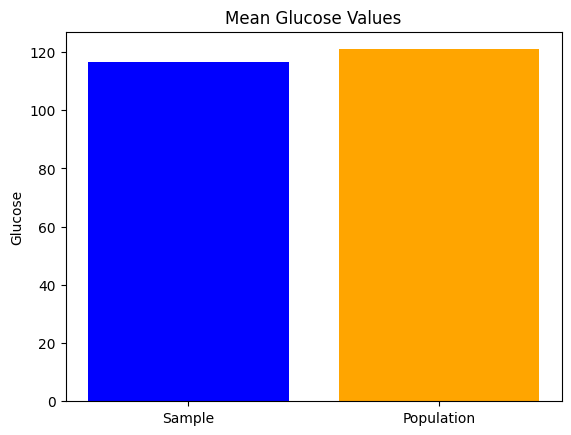

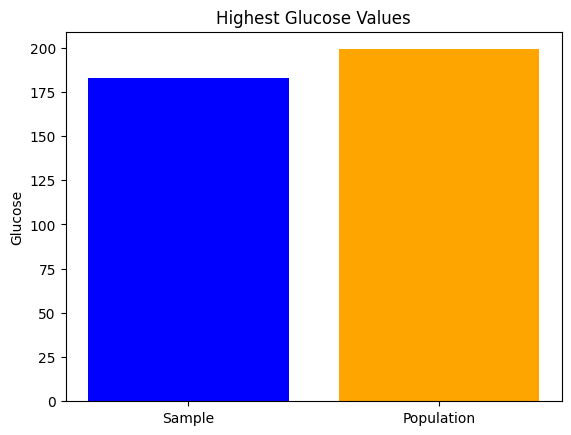

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('diabetes.csv')

np.random.seed(42)

sample = data.sample(n=25)

sample_mean_glucose = sample['Glucose'].mean()
sample_highest_glucose = sample['Glucose'].max()

population_mean_glucose = data['Glucose'].mean()
population_highest_glucose = data['Glucose'].max()

plt.bar(['Sample', 'Population'], [sample_mean_glucose, population_mean_glucose], color=['blue', 'orange'])
plt.title('Mean Glucose Values')
plt.ylabel('Glucose')
plt.show()

plt.bar(['Sample', 'Population'], [sample_highest_glucose, population_highest_glucose], color=['blue', 'orange'])
plt.title('Highest Glucose Values')
plt.ylabel('Glucose')
plt.show()


B)Find the 98th percentile of BMI of your sample and the population and compare the results
using charts.

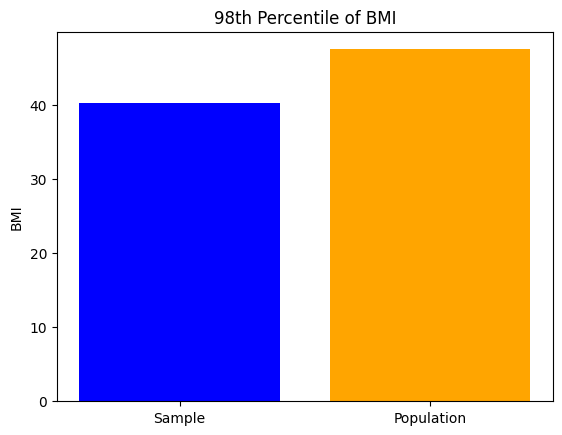

In [3]:
sample_98th_percentile_bmi = np.percentile(sample['BMI'], 98)
population_98th_percentile_bmi = np.percentile(data['BMI'], 98)

plt.bar(['Sample', 'Population'], [sample_98th_percentile_bmi, population_98th_percentile_bmi], color=['blue', 'orange'])
plt.title('98th Percentile of BMI')
plt.ylabel('BMI')
plt.show()


C)Using bootstrap (replace= True), create 500 samples (of 150 observation each) from the
population and find the average mean, standard deviation and percentile for BloodPressure and
compare this with these statistics from the population for the same variable. Again, you should
create charts for this comparison.

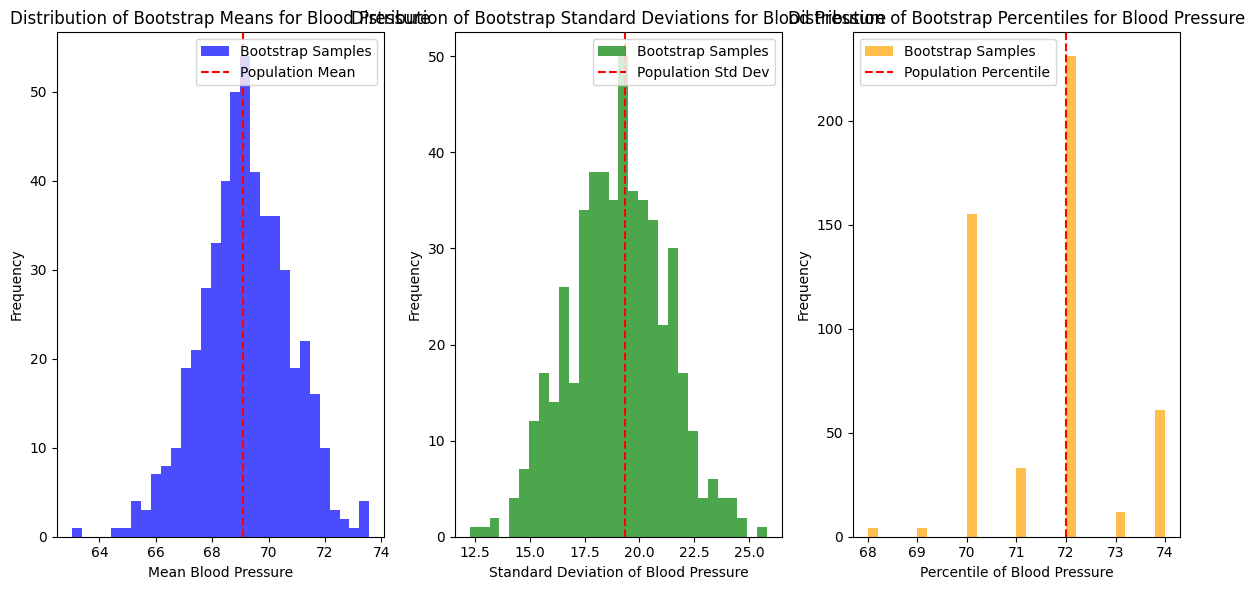

In [4]:
bootstrap_means = []
bootstrap_std_devs = []
bootstrap_percentiles = []

for _ in range(500):
    bootstrap_sample = np.random.choice(data['BloodPressure'], size=150, replace=True)
    bootstrap_means.append(np.mean(bootstrap_sample))
    bootstrap_std_devs.append(np.std(bootstrap_sample))
    bootstrap_percentiles.append(np.percentile(bootstrap_sample, 50))

population_mean_bp = np.mean(data['BloodPressure'])
population_std_dev_bp = np.std(data['BloodPressure'])
population_percentile_bp = np.percentile(data['BloodPressure'], 50)

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.hist(bootstrap_means, bins=30, color='blue', alpha=0.7, label='Bootstrap Samples')
plt.axvline(population_mean_bp, color='red', linestyle='--', label='Population Mean')
plt.title('Distribution of Bootstrap Means for Blood Pressure')
plt.xlabel('Mean Blood Pressure')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 3, 2)
plt.hist(bootstrap_std_devs, bins=30, color='green', alpha=0.7, label='Bootstrap Samples')
plt.axvline(population_std_dev_bp, color='red', linestyle='--', label='Population Std Dev')
plt.title('Distribution of Bootstrap Standard Deviations for Blood Pressure')
plt.xlabel('Standard Deviation of Blood Pressure')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 3, 3)
plt.hist(bootstrap_percentiles, bins=30, color='orange', alpha=0.7, label='Bootstrap Samples')
plt.axvline(population_percentile_bp, color='red', linestyle='--', label='Population Percentile')
plt.title('Distribution of Bootstrap Percentiles for Blood Pressure')
plt.xlabel('Percentile of Blood Pressure')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()
